# Titanic : Analysis of a disaster

#### Author - Paawan Mukker

> This notebook strives to answer some chosen question using simple exploratory data analysis, and descriptive statistics, (the aim is to avoid using any inferential statistics or Machine learning) on the titanic dataset. This notebook follows on lines of Cross-Industry Standard Process for Data Mining (CRISP-DM)





## Phase 1 - Business Understanding

### Introduction

Titanic is arguably one of the most famous ship voyages of the past, unfortunately not because of something glorious but something unlucky - An accident leading to shipwrecks.
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Please find more details here at [Kaggle](https://www.kaggle.com/c/titanic).

###  Objective

#### Buisness perpective

The objective of this case study is to answer the following questions:
- Does having family members on board increases your survival ? 
- Was there any advantage of survival to a particular gender ?
- Which aspect had most crucial role to play in passengers survival ?

#### Technical perspective

Answer the above posed questions with the help of appropriate use of data/Statistics/Visualizations to justify or nullify the proposed hypothesis.

## Phase 2 - Data Understanding

### Data Collection


The data has been taken from [Kaggle's Titanic Challenge](https://www.kaggle.com/c/titanic).
The description from the same is as follows.

The data has been split into two groups:

- training set (train.csv) : The training set should be used to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. 


- test set (test.csv) : The test set should be used to see how well the model performs on unseen data. For the test set, we do not provide the ground truth for each passenger.

For this study we don't need to look into test.csv and we'll focus on train.csv only.

### Data Description

Let's import the required libraries.

In [1]:
# Libraries for Visualisation/plots.
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import radviz

# Libraries for data handling
%matplotlib inline
import numpy as np
import pandas as pd

# Libraries for data modeling
from sklearn.ensemble import RandomForestClassifier

#### Let's read our data using pandas:

In [2]:
# Load the data as pandas data frame
titanic_train = pd.read_csv("./data/train.csv")
titanic_test  = pd.read_csv("./data/test.csv") # Will not be used

#### Show an overview of our data:

_Dimension of the data:_

In [3]:
titanic_train.shape

(891, 12)

_First few columns:_

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is what each of the column means:
```
Variable Name	Description
PassengerId     Passenger Id.
Survived	    1 for Survived, 0 otherwise
Pclass	        Passenger’s class
Name	        Passenger’s name
Sex	            Passenger’s sex
Age	            Passenger’s age
SibSp	        Number of siblings/spouses on ship
Parch	        Number of parents/children on ship
Ticket	        Passenger’s Ticket number
Fare	        Passenger’s Ticket Fare
Cabin	        Passenger’s Cabin Number
Embarked	    Place from where Passenger boareded the ship.
```

Some other notes about variables from [Kaggle](https://www.kaggle.com/c/titanic) itself:

```
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```

#### Compute basic statistics

In [5]:
# Use only relevant columns

to_have = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_train[to_have].describe(exclude=[type(None)])

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


#### Assessing Missing Values in columns


In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

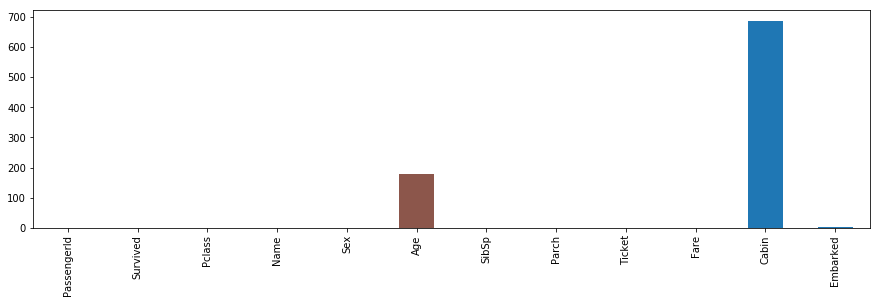

In [7]:
titanic_train.isnull().sum().plot(kind='bar', figsize=(15,4))


## Phase 3 - Data Preparation

### Data cleaning

#### Re-Encode Categorical Features

In [8]:
titanic_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
drop_categorical_var = ['Name', 'Embarked', 'Ticket', 'Cabin', 'PassengerId']
bin_categorical_var  = ['Sex']
multi_categorical_var = ['Pclass']


In [10]:
# Drop not required categorical variable
titanic_train.drop(drop_categorical_var, axis=1, inplace=True)


In [11]:
# Re-encode binary categorical variable(s) to be kept in the analysis.

sex_map = {'male':0, 'female':1}
titanic_train['Sex'] = titanic_train['Sex'].map(sex_map)

# for attribute in bin_categorical_var:
    
#     for ind, row in enumerate(titanic_train[attribute].value_counts().index):
#         titanic_train[attribute] = titanic_train[attribute].replace(row, ind)

In [12]:
titanic_train['Sex'].head()


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [13]:
# Re-encode multi categorical variable(s) to be kept in the analysis.

for attribute in multi_categorical_var:
    
    titanic_train = pd.get_dummies(titanic_train, columns=[attribute])
    

#### Fix missing Values

Let's target the most seen Null or NA values.

In [14]:
titanic_train.isnull().sum()


Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

For replacing missing data there can be multiple stratergies. Let's see which strategy suits us the best.
We can:
1. Deleting rows/columns with missing values - but since the dataset is small removing rows is not a good way to go but a field can be dropped for analysis.
2. Replace missing values with values inferred from data such as mean, median, etc - This seems an appropriate choice for us.
3. Randomly set values - Not a wise strategy for most cases.
4. Predict the missing values based on other values from data - This also seems an appropriate choice for us.

Before selecting which technique to employ for our case, we need to look for how relevant the missing field is with respect to our objectives. Hence we emply different techniques for different fields. For:

- Age: So for all the questions we have posed in objectives Age doesn't seem to affect explictly but may affect impliclty hence instead of dropping(1) and predicting(4) we choose to replace it with mean i.e. strategy 2.

In [15]:
titanic_train.Age=titanic_train.Age.fillna(titanic_train.Age.mean())


#### Data Construction

We can't predict role of family in survival since we don't have any field that directly corresponds to that. Hence we need to do come up with something based on existing fields which are SibSp (Siblings/Spouse) and Parch(Parent/children).

In [16]:
# Source - http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = titanic_train[ 'Parch' ] + titanic_train[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()


,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [17]:
# Add family to df and remove Parch and SibSp

titanic_train.drop(['Parch', 'SibSp'], axis=1, inplace=True)
titanic_train = pd.concat( [titanic_train, family], axis=1)
titanic_train.head()


,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,FamilySize,Family_Single,Family_Small,Family_Large
0,0,0,22.0,7.2500,0,0,1,2,0,1,0
1,1,1,38.0,71.2833,1,0,0,2,0,1,0
2,1,1,26.0,7.9250,0,0,1,1,1,0,0
3,1,1,35.0,53.1000,1,0,0,2,0,1,0
4,0,0,35.0,8.0500,0,0,1,1,1,0,0


### Phase 4 - Modeling

#### Modelling technique selection

For modelling we are using RandomForest classifiers here and the reason to choose them is as follows :

- This is a classifcation problem so we are restricted to use classification algorithms.
- We have the labelled data, hence this becomes a supervised learning problem, also what needs to be noted here that we need to predicted Survived/Not survived hence a binary variable.
- Considering above two points we are limited to ML algos for binary supervised classifcation problem.
- I choose Random Forest amongst others like SVM, etc. They don't require many hyperparameters to tune. And fits well for the limited, simple yet non-linear dataset like ours. Also random forests are much easier to train; it's easier to get a good, robust model.

#### Train-Test split

Our data is already split.
training data in - titanic_train.
And testing data in titanic_test.
**For this case we're NOT concerned with test data becasue our objective is not achieving accuracy in prediction rather the importance of features. For this same reason we're not tuning the ideal hyperparameters using random or grid search.**

Let's split the training data and labels.

In [18]:
x  = titanic_train.drop(['Survived'], axis=1)
y = titanic_train.Survived


#### Build Model

In [19]:
clf = RandomForestClassifier(random_state=0, max_features=None)
clf_tit = clf.fit(x, y)


### Phase 5 - Evaluation

In this section we'll be evaluating the questions asked instead of the model.

- #### Does having family members on board increases your survival ?

Ler us plot the bar graph of family members on ship vs their survival count.

Text(0,0.5,'Count of Survival/Non Sruvival')

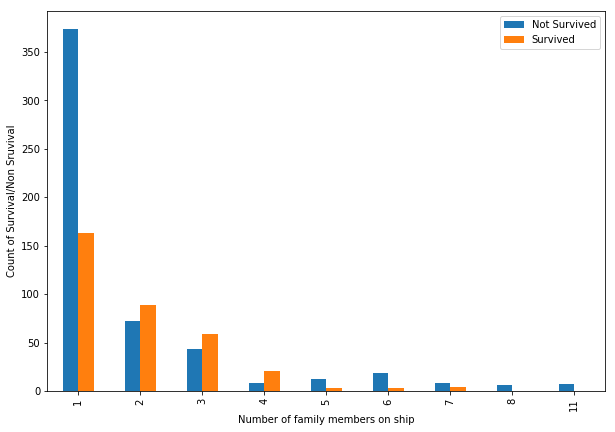

In [20]:
freq1 = pd.value_counts(titanic_train[titanic_train['Survived']==1].FamilySize)
freq2 = pd.value_counts(titanic_train[titanic_train['Survived']==0].FamilySize)
ax = pd.concat([ freq2.rename('Not Survived'), freq1.rename('Survived')], axis=1).plot.bar(figsize=(10,7))
ax.set_xlabel('Number of family members on ship')
ax.set_ylabel('Count of Survival/Non Sruvival')


**Ans** : Using the above graph we can see that there’s a survival penalty to singletons and those with family sizes above 4. 
Hence to answer the asked question, Yes having family members on board increases your survival but only if you have family members less than 4 beyond that it hurts your chances rather than increasing it.

- #### Was there any advantage of survival to a particular gender ?

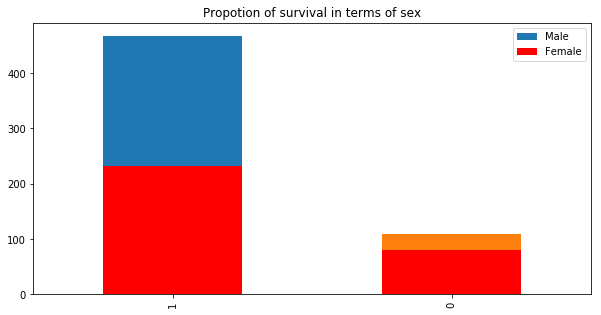

In [21]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(111)
titanic_train.Survived[titanic_train.Sex == 0].value_counts().plot(kind='bar', label='Male')
titanic_train.Survived[titanic_train.Sex == 1].value_counts().plot(kind='bar', label='Female', color='red')

plt.title("Propotion of survival in terms of sex"); plt.legend(loc='best')


Text(0,0.5,'Count of Survival/Non Sruvival')

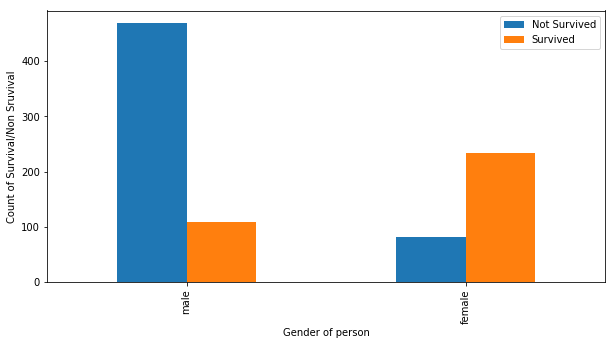

In [22]:
freq1 = pd.value_counts(titanic_train[titanic_train['Survived']==1].Sex)
freq2 = pd.value_counts(titanic_train[titanic_train['Survived']==0].Sex)
ax = pd.concat([ freq2.rename('Not Survived'), freq1.rename('Survived')], axis=1).plot.bar(figsize=(10,5))
ax.set_xticklabels(['male', 'female'])
ax.set_xlabel('Gender of person')
ax.set_ylabel('Count of Survival/Non Sruvival')


**Ans** : The clear answer is yes; There was an advantage to women as far as survival is concerned.

- #### Which aspect had most crucial role to play in passengers survival ?

For looking at the most important feature for survival prediction let us first plot the used features in sorted order by the classifier.

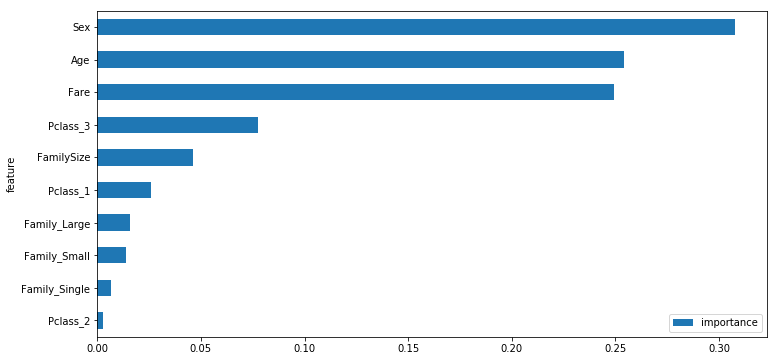

In [23]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(12,6))


Although it is clear which is the most important factor, Let us see another interesting visualisation for the same, namely Radviz.
>RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently. Description from [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-radviz).

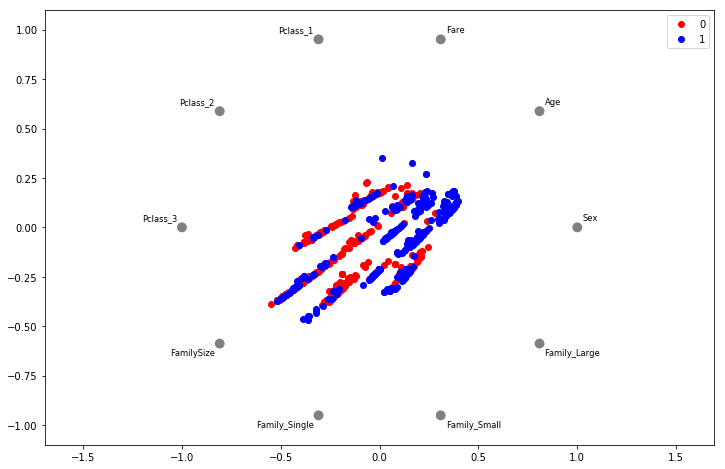

In [24]:
fig = plt.figure(figsize=(12,8))
radviz(titanic_train, 'Survived', color=['r','b'])


**Ans** : It turns out that 'Sex' of a person has the most affect in terms of survival. From previous analysis we can see that women were most likely to survive.
After 'Sex', Age seems to be an important factor influencing the survival of a particular person.